In [1]:
!pip install memory_profiler

In [2]:
import csv
import time
import sys
from memory_profiler import memory_usage
import tracemalloc
import pickle

In [3]:
naoordenados = ['/content/naoordenados/100.txt','/content/naoordenados/200.txt','/content/naoordenados/1000.txt','/content/naoordenados/2000.txt','/content/naoordenados/5000.txt','/content/naoordenados/10000.txt','/content/naoordenados/50000.txt','/content/naoordenados/100000.txt','/content/naoordenados/500000.txt','/content/naoordenados/1000000.txt']
ordenados = ['/content/ordenados/100.txt','/content/ordenados/200.txt','/content/ordenados/1000.txt','/content/ordenados/2000.txt','/content/ordenados/5000.txt','/content/ordenados/10000.txt','/content/ordenados/50000.txt','/content/ordenados/100000.txt','/content/ordenados/500000.txt','/content/ordenados/1000000.txt']


In [4]:
#Busca Sequencial

def buscaSequencial_v1(x, v):
    indice = -1
    for i in range(len(v)):
        if v[i] == x:
            indice = i
    return indice

def buscaSequencial_v2(x, v):
    for i in range(len(v)):
        if v[i] == x:
            return i
    return -1

def buscaSequencialv1Auto(ordenados, naoordenados):
  tracemalloc.start()

  buscasequencialv1naoordenado = {"memoria":{}, "tempo":{}}
  buscasequencialv1ordenado = {"memoria":{}, "tempo":{}}


  for arquivo in (ordenados):
    arrayo = []
    with open(arquivo, 'r') as file:
        readero = csv.reader(file)
        for line in readero:
            for token in line:
                arrayo.append(int(token))


    startMemoryo, _ = tracemalloc.get_traced_memory()
    startTimeo = time.time()
    buscaSequencial_v1(arrayo[len(arrayo) - 1], arrayo)
    endTimeo = time.time()
    endMemoryo, _ = tracemalloc.get_traced_memory()

    totalTimeo = endTimeo - startTimeo
    totalMemoryo = (endMemoryo - startMemoryo)

    buscasequencialv1ordenado['memoria'][arquivo] = totalMemoryo
    buscasequencialv1ordenado['tempo'][arquivo] = totalTimeo

  for arquivo in (naoordenados):
    arrayn = []
    with open(arquivo, 'r') as file:
        readern = csv.reader(file)
        for line in readern:
            for token in line:
                arrayn.append(int(token))


    startMemoryn, _ = tracemalloc.get_traced_memory()
    startTimen = time.time()
    buscaSequencial_v1(arrayn[len(arrayn) - 1], arrayn)
    endTimen = time.time()
    endMemoryn, _ = tracemalloc.get_traced_memory()

    totalTimen = endTimen - startTimen
    totalMemoryn = (endMemoryn - startMemoryn)

    buscasequencialv1naoordenado['memoria'][arquivo] = totalMemoryo
    buscasequencialv1naoordenado['tempo'][arquivo] = totalTimeo

  return buscasequencialv1ordenado, buscasequencialv1naoordenado

v1ordenado, v1naoordenado = buscaSequencialv1Auto(ordenados, naoordenados)

with open("BuscaSequencialv1Ordenada.pkl", "wb") as f:
    # Usa a função dump para salvar o dicionário no arquivo
    pickle.dump(v1ordenado, f)

with open("BuscaSequencialv1NaoOrdenada.pkl", "wb") as f:
    # Usa a função dump para salvar o dicionário no arquivo
    pickle.dump(v1naoordenado, f)



In [8]:
def buscaSequencialv2Auto(ordenados, naoordenados):
  tracemalloc.start()

  buscasequencialv2naoordenado = {"memoria":{}, "tempo":{}}
  buscasequencialv2ordenado = {"memoria":{}, "tempo":{}}


  for arquivo in (ordenados):
    arrayo = []
    with open(arquivo, 'r') as file:
        readero = csv.reader(file)
        for line in readero:
            for token in line:
                arrayo.append(int(token))


    startMemoryo, _ = tracemalloc.get_traced_memory()
    startTimeo = time.time()
    buscaSequencial_v2(arrayo[len(arrayo) - 1], arrayo)
    endTimeo = time.time()
    endMemoryo, _ = tracemalloc.get_traced_memory()

    totalTimeo = endTimeo - startTimeo
    totalMemoryo = (endMemoryo - startMemoryo)

    buscasequencialv2ordenado['memoria'][arquivo] = totalMemoryo
    buscasequencialv2ordenado['tempo'][arquivo] = totalTimeo

  for arquivo in (naoordenados):
    arrayn = []
    with open(arquivo, 'r') as file:
        readern = csv.reader(file)
        for line in readern:
            for token in line:
                arrayn.append(int(token))


    startMemoryn, _ = tracemalloc.get_traced_memory()
    startTimen = time.time()
    buscaSequencial_v2(arrayn[len(arrayn) - 1], arrayn)
    endTimen = time.time()
    endMemoryn, _ = tracemalloc.get_traced_memory()

    totalTimen = endTimen - startTimen
    totalMemoryn = (endMemoryn - startMemoryn)

    buscasequencialv2naoordenado['memoria'][arquivo] = totalMemoryo
    buscasequencialv2naoordenado['tempo'][arquivo] = totalTimeo

  return buscasequencialv2ordenado, buscasequencialv2naoordenado

v2ordenado, v2naoordenado = buscaSequencialv2Auto(ordenados, naoordenados)

with open("BuscaSequencialv2Ordenada.pkl", "wb") as f:
    # Usa a função dump para salvar o dicionário no arquivo
    pickle.dump(v2ordenado, f)

with open("BuscaSequencialv2NaoOrdenada.pkl", "wb") as f:
    # Usa a função dump para salvar o dicionário no arquivo
    pickle.dump(v2naoordenado, f)

In [ ]:
#Busca Ternaria

def bt(vet, n, x):
    inicio = 0
    fim = n - 1
    while inicio <= fim:
        meio_esquerdo = inicio + (fim - inicio) // 3
        meio_direito = fim - (fim - inicio) // 3
        if vet[meio_esquerdo] == x:
            return meio_esquerdo
        elif vet[meio_direito] == x:
            return meio_direito
        elif vet[meio_esquerdo] > x:
            fim = meio_esquerdo - 1
        elif vet[meio_direito] < x:
            inicio = meio_direito + 1
        else:
            inicio = meio_esquerdo + 1
            fim = meio_direito - 1
    return -1


def buscaTernariaAuto(ordenados):
  tracemalloc.start()

  buscaternariaordenado = {"memoria":{}, "tempo":{}}


  for arquivo in (ordenados):
    arrayo = []
    with open(arquivo, 'r') as file:
        readero = csv.reader(file)
        for line in readero:
            for token in line:
                arrayo.append(int(token))


    startMemoryo, _ = tracemalloc.get_traced_memory()
    startTimeo = time.time()
    bt(arrayo, len(arrayo), arrayo[len(arrayo) - 1])
    endTimeo = time.time()
    endMemoryo, _ = tracemalloc.get_traced_memory()

    totalTimeo = endTimeo - startTimeo
    totalMemoryo = (endMemoryo - startMemoryo)

    buscaternariaordenado['memoria'][arquivo] = totalMemoryo
    buscaternariaordenado['tempo'][arquivo] = totalTimeo


  return buscaternariaordenado

dicbuscaternaria = buscaTernariaAuto(ordenados)

with open("buscaTernaria.pkl", "wb") as f:
    # Usa a função dump para salvar o dicionário no arquivo
    pickle.dump(dicbuscaternaria, f)

In [ ]:
#Pesquisa Binaria

def PesquisaBinaria(x, v, e, d):
    meio = (e + d) // 2
    if v[meio] == x:
        return meio
    if e >= d:
        return -1
    elif v[meio] < x:
        return PesquisaBinaria(x, v, meio + 1, d)
    else:
        return PesquisaBinaria(x, v, e, meio - 1)

def buscaBinariaAuto(ordenados):
  tracemalloc.start()

  buscabinariaordenado = {"memoria":{}, "tempo":{}}


  for arquivo in (ordenados):
    arrayo = []
    with open(arquivo, 'r') as file:
        readero = csv.reader(file)
        for line in readero:
            for token in line:
                arrayo.append(int(token))


    startMemoryo, _ = tracemalloc.get_traced_memory()
    startTimeo = time.time()
    PesquisaBinaria(arrayo[len(arrayo) - 1], arrayo, 0, len(arrayo))
    endTimeo = time.time()
    endMemoryo, _ = tracemalloc.get_traced_memory()

    totalTimeo = endTimeo - startTimeo
    totalMemoryo = (endMemoryo - startMemoryo)

    buscabinariaordenado['memoria'][arquivo] = totalMemoryo
    buscabinariaordenado['tempo'][arquivo] = totalTimeo


  return buscabinariaordenado

dicbuscabinaria = buscaBinariaAuto(ordenados)

with open("buscaBinaria.pkl", "wb") as f:
    # Usa a função dump para salvar o dicionário no arquivo
    pickle.dump(dicbuscabinaria, f)


In [46]:
import random

numeros = [random.randint(0, 10000) for _ in range(100000)] # gera 5000 números aleatórios entre 0 e 10000
linhas = [",".join(map(str, numeros[i:i+10])) for i in range(0, len(numeros), 10)] # divide os números em linhas de 10 elementos e converte para string

with open("100000000.txt", "w") as arquivo:
    arquivo.write("\n".join(linhas)) # escreve as linhas no arquivo, separadas por quebra de linha


In [52]:
nome_arquivo = 'BuscaCubica_time.pkl'
with open(nome_arquivo, 'rb') as arquivo:
    BuscaCubica_time = pickle.load(arquivo)

In [53]:
BuscaCubica_time

{100: 50892000,
 200: 330701200,
 1000: 646782435100,
 2000: 6141455403500,
 5000: 95764141783600,
 10000: None,
 50000: None,
 100000: None,
 500000: None,
 1000000: None,
 5000000: None,
 10000000: None,
 100000000: None}

In [54]:
BuscaCubica_time = {key: value for key, value in BuscaCubica_time.items() if key <= 5000}

In [55]:
BuscaCubica_time

{100: 50892000,
 200: 330701200,
 1000: 646782435100,
 2000: 6141455403500,
 5000: 95764141783600}

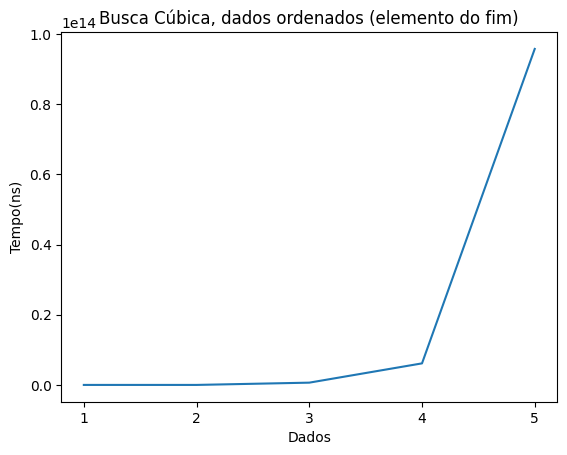

In [56]:
import matplotlib.pyplot as plt

#data = {'tempo': {'arquivo1': 1, 'arquivo2': 2, 'arquivo3': 3, 'arquivo4': 4, 'arquivo5': 5, 'arquivo6': 6, 'arquivo7': 7, 'arquivo8': 8, 'arquivo9': 9, 'arquivo10': 10},
#        'memoria': {'arquivo1': 10, 'arquivo2': 20, 'arquivo3': 30, 'arquivo4': 40, 'arquivo5': 50, 'arquivo6': 60, 'arquivo7': 70, 'arquivo8': 80, 'arquivo9': 90, 'arquivo10': 100}}

x = range(1, len(BuscaCubica_time) + 1)
y = BuscaCubica_time.values()

plt.plot(x, y)
plt.title('Busca Cúbica, dados ordenados (elemento do fim)')
plt.xlabel('Dados')
plt.ylabel('Tempo(ns)')
plt.xticks(x)
plt.show()

In [19]:
y

dict_values([6488164, 155989, 201972, 152691, 152517, None, None, None, None, None, None, None, None])

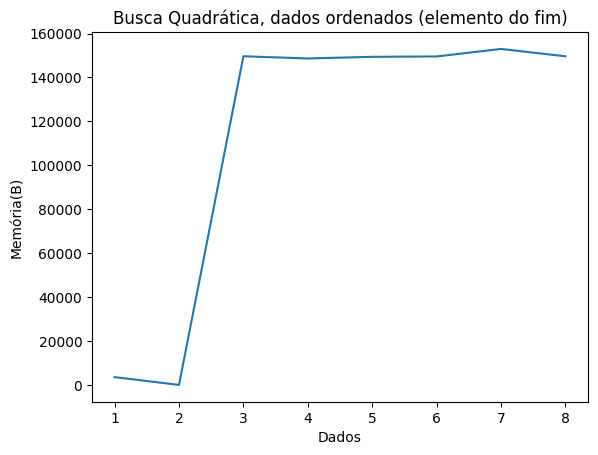

In [51]:
x = range(1, len(BuscaQuadratica_space) + 1)
y = BuscaQuadratica_space.values()

plt.plot(x, y)
plt.title('Busca Quadrática, dados ordenados (elemento do fim)')
plt.xlabel('Dados')
plt.ylabel('Memória(B)')
plt.xticks(x)
plt.show()


#Códigos opcionais

In [ ]:
#Busca Cubica

def BuscaCubica(vet, numeroProcurado):
  posicao = -1
  for i in range(len(vet)):
      for j in range(len(vet)):
          for l in range(len(vet)):
              if vet[i] == numeroProcurado and vet[j] == numeroProcurado and vet[l] == numeroProcurado:
                  posicao = i
  return posicao


fileName = "/content/100.txt"
array = []
with open(fileName, 'r') as file:
    reader = csv.reader(file)
    for line in reader:
        for token in line:
            array.append(int(token))

tracemalloc.start()



startMemory, _ = tracemalloc.get_traced_memory()
startTime = time.time()
print(BuscaCubica(array, 1000))
endTime = time.time()
endMemory, _ = tracemalloc.get_traced_memory()

totalTime = endTime - startTime
totalMemory = (endMemory - startMemory)

print(f"Tempo gasto: {totalTime}")
print(f"Memória usada: {totalMemory} MB")

-1
Tempo gasto: 0.11809849739074707
Memória usada: 0.00058746337890625 MB


In [ ]:
#Busca Quadratica

def BuscaQuadratica(vet, numeroProcurado):
  contador = 0
  posicao = -1
  entrou = False
  for i in range(len(vet)):
      for j in range(i, len(vet)):
          if vet[i] == numeroProcurado:
              if not entrou:
                  posicao = i
                  if vet[j] == numeroProcurado:
                      contador += 1
      if contador > 0:
          entrou = True
  if entrou:
      print("Posicao: " + str(posicao) + " - contador de repeticao: " + str(contador))



Posicao: 6 - contador de repeticao: 1


In [ ]:
import matplotlib.pyplot as plt

#data = {'tempo': {'arquivo1': 1, 'arquivo2': 2, 'arquivo3': 3, 'arquivo4': 4, 'arquivo5': 5, 'arquivo6': 6, 'arquivo7': 7, 'arquivo8': 8, 'arquivo9': 9, 'arquivo10': 10},
#        'memoria': {'arquivo1': 10, 'arquivo2': 20, 'arquivo3': 30, 'arquivo4': 40, 'arquivo5': 50, 'arquivo6': 60, 'arquivo7': 70, 'arquivo8': 80, 'arquivo9': 90, 'arquivo10': 100}}

x = range(1, len(v1ordenado['tempo']) + 1)
y = v1ordenado['tempo'].values()

plt.plot(x, y)
plt.title('Busca Sequencial V1, dados ordenados (elemento do fim)')
plt.xlabel('Dados')
plt.ylabel('Tempo(s)')
plt.xticks(x)
plt.show()